In [1]:
from hp_lattice import *
from dwave.samplers import SimulatedAnnealingSampler

# QUBO Formulation

## $S_4$

Sequence (0 = P, 1 = H): [1, 0, 0, 1]
Sequence length = 4
Lattice dimensions : [3, 3]
Created QBM with bit sequence keys.
bit vector has size 18, each with 14.11111111111111 connections on average.
Asking SA sampler for a sample
{'beta_range': [1.0, 3.225099943713703], 'beta_schedule_type': 'custom', 'timing': {'preprocessing_ns': 450875, 'sampling_ns': 222620292, 'postprocessing_ns': 154708}}
Received sample set
EHP = -1.0, E1 = 8.881784197001252e-16, E2 = 0.0, E3 = 0.0, E = -0.9999999999999991
Asking SA sampler for a sample
{'beta_range': [1.0, 3.225099943713703], 'beta_schedule_type': 'custom', 'timing': {'preprocessing_ns': 417083, 'sampling_ns': 224124417, 'postprocessing_ns': 137583}}
Received sample set
EHP = -1.0, E1 = 8.881784197001252e-16, E2 = 0.0, E3 = 0.0, E = -0.9999999999999991
Asking SA sampler for a sample
{'beta_range': [1.0, 3.225099943713703], 'beta_schedule_type': 'custom', 'timing': {'preprocessing_ns': 395042, 'sampling_ns': 221912625, 'postprocessing_ns': 132417

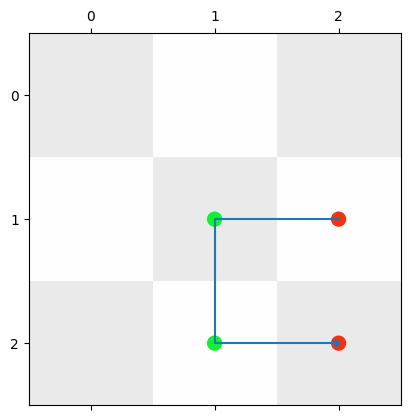

In [13]:
model = Lattice_HP_QUBO(
    dim = [3, 3],
    sequence="HPPH",
    Lambda=(2.1, 2.4, 3.0),
)

sampler = SimulatedAnnealingSampler()

mysamples = []
success_energy = -1
successful_samples = []

betas=[1.05**j for j in range(25)]
for i in range(0, 5):
    print("Asking SA sampler for a sample")
    sampleset = sampler.sample_qubo(
        model.interaction_matrix(),
        beta_schedule_type='custom',
        beta_schedule=betas,
        beta_range=[min(betas), max(betas)],
        num_sweeps_per_beta=100_000,
        num_reads=1,
        )
    print(sampleset.info)
    print("Received sample set")
    sample0 = sampleset.record[0]
    model.print_energies(sample0.sample)
    mysamples.append(sample0.sample)

# for s in mysamples:
#     model.show_lattice(s)
model.show_lattice(mysamples[0])

## $S_{10}$

Sequence (0 = P, 1 = H): [1, 0, 0, 1, 0, 0, 1, 0, 0, 1]
Sequence length = 10
Lattice dimensions : [3, 4]
Created QBM with bit sequence keys.
bit vector has size 60, each with 23.966666666666665 connections on average.
Asking SA sampler for a sample
{'beta_range': [1.0, 3.225099943713703], 'beta_schedule_type': 'custom', 'timing': {'preprocessing_ns': 1025334, 'sampling_ns': 727729125, 'postprocessing_ns': 186000}}
Received sample set
EHP = -4.0, E1 = -8.881784197001252e-16, E2 = 0.0, E3 = 0.0, E = -4.000000000000001
Asking SA sampler for a sample
{'beta_range': [1.0, 3.225099943713703], 'beta_schedule_type': 'custom', 'timing': {'preprocessing_ns': 490000, 'sampling_ns': 725341375, 'postprocessing_ns': 128416}}
Received sample set
EHP = -4.0, E1 = -8.881784197001252e-16, E2 = 0.0, E3 = 0.0, E = -4.000000000000001
Asking SA sampler for a sample
{'beta_range': [1.0, 3.225099943713703], 'beta_schedule_type': 'custom', 'timing': {'preprocessing_ns': 488833, 'sampling_ns': 724438542, 'postp

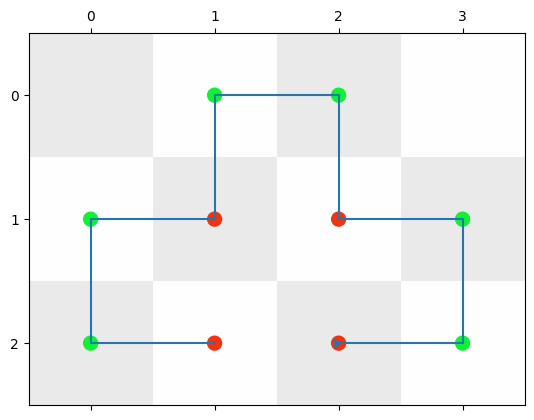

In [14]:
model = Lattice_HP_QUBO(
    dim = [3, 4],
    sequence="HPPHPPHPPH",
    Lambda=(2.1, 2.4, 3.0),
)

sampler = SimulatedAnnealingSampler()

mysamples = [] 

betas=[1.05**j for j in range(25)]
for i in range(0, 5):
    print("Asking SA sampler for a sample")
    sampleset = sampler.sample_qubo(
        model.interaction_matrix(),
        beta_schedule_type='custom',
        beta_schedule=betas,
        beta_range=[min(betas), max(betas)],
        num_sweeps_per_beta=100_000,
        num_reads=1,
        )
    print(sampleset.info)
    print("Received sample set")
    sample0 = sampleset.record[0]
    model.print_energies(sample0.sample)
    mysamples.append(sample0.sample)

# for s in mysamples:
#     model.show_lattice(s)
model.show_lattice(mysamples[0])

# Ising formulation

In [2]:
from dimod.utilities import qubo_to_ising

## $S_4$

Sequence (0 = P, 1 = H): [1, 0, 0, 1]
Sequence length = 4
Lattice dimensions : [3, 3]
Created QBM with bit sequence keys.
bit vector has size 18, each with 14.11111111111111 connections on average.
Asking SA sampler for a sample
{'beta_range': [1.0, 3.225099943713703], 'beta_schedule_type': 'custom', 'timing': {'preprocessing_ns': 495167, 'sampling_ns': 448214667, 'postprocessing_ns': 138416}}
Received sample set
EHP = -12.0, E1 = 104.99999999999991, E2 = 21.599999999999998, E3 = 72.0, E = 186.5999999999999
Asking SA sampler for a sample
{'beta_range': [1.0, 3.225099943713703], 'beta_schedule_type': 'custom', 'timing': {'preprocessing_ns': 373875, 'sampling_ns': 444295791, 'postprocessing_ns': 145542}}
Received sample set
EHP = -12.0, E1 = 104.99999999999991, E2 = 21.599999999999998, E3 = 72.0, E = 186.5999999999999
Asking SA sampler for a sample
{'beta_range': [1.0, 3.225099943713703], 'beta_schedule_type': 'custom', 'timing': {'preprocessing_ns': 374583, 'sampling_ns': 444191459, 'po

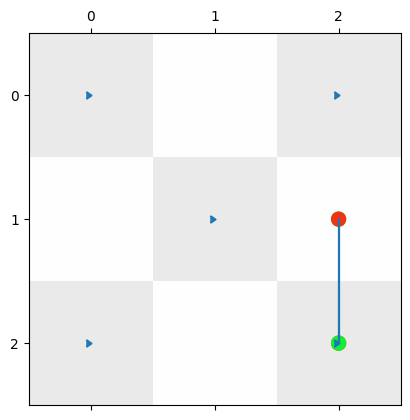

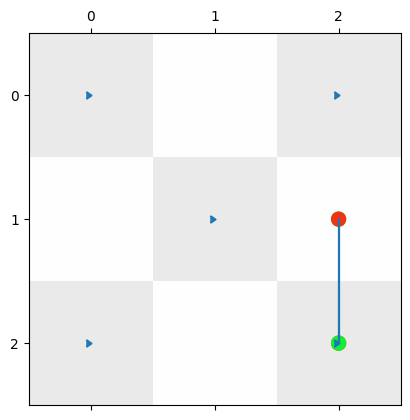

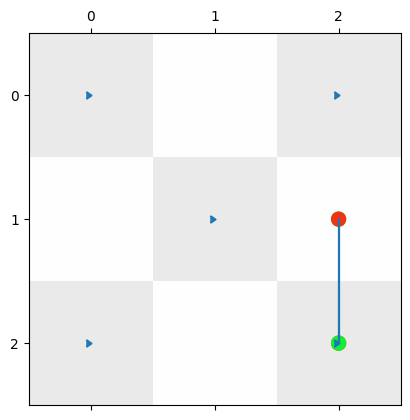

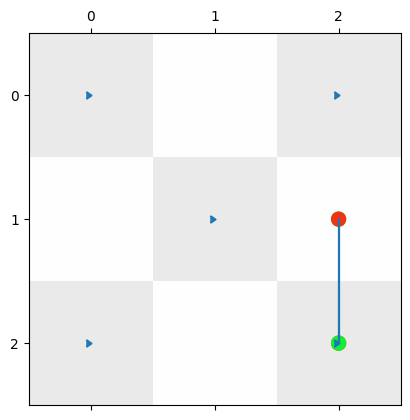

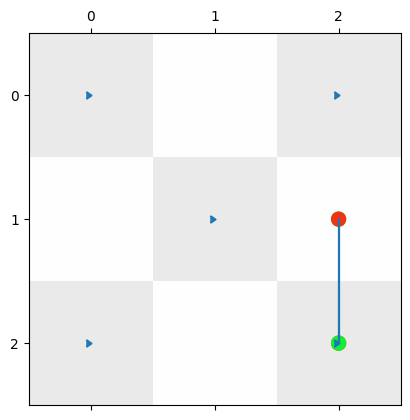

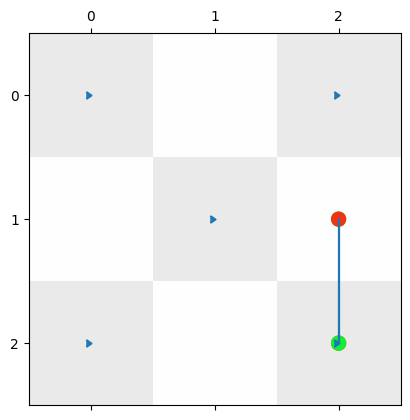

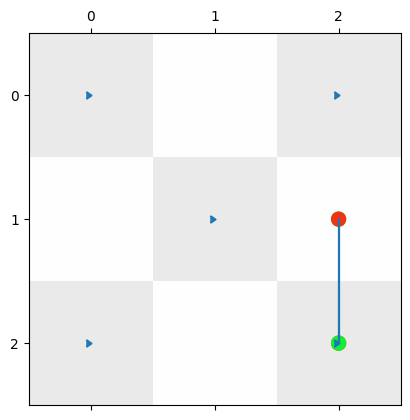

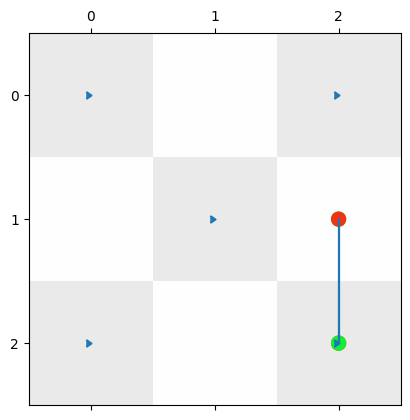

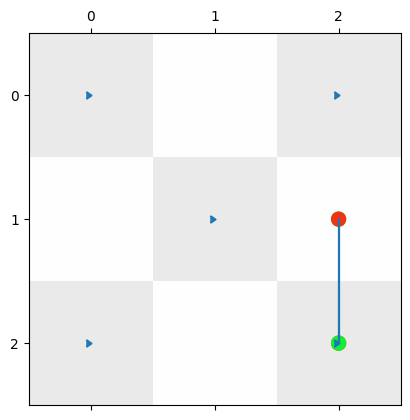

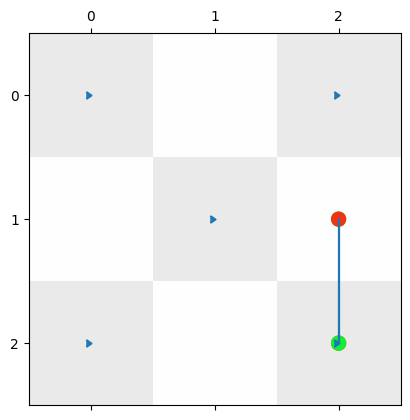

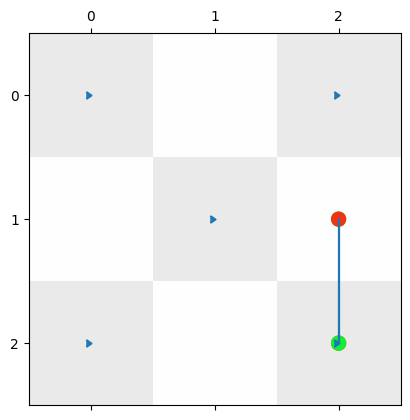

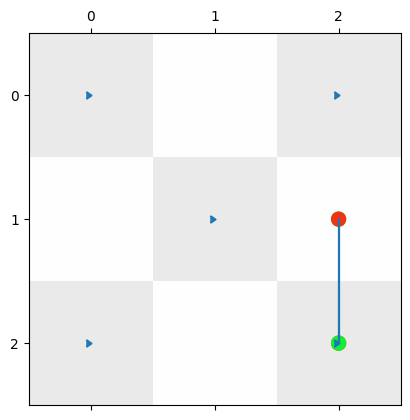

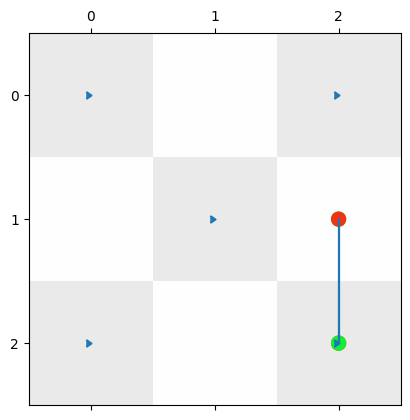

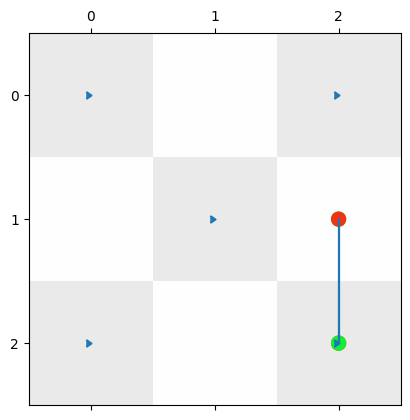

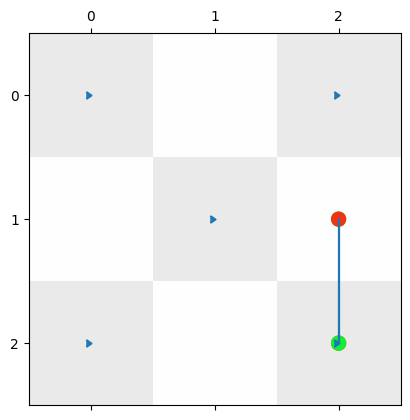

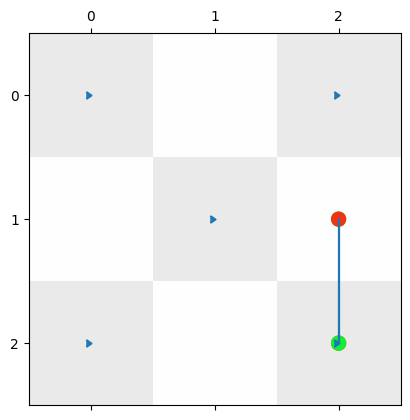

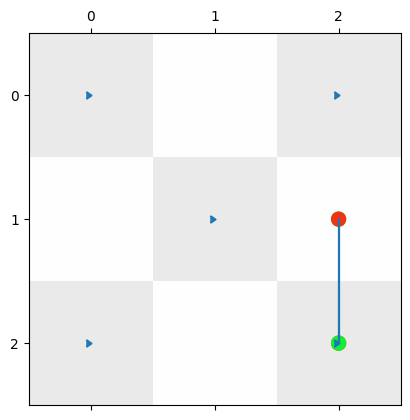

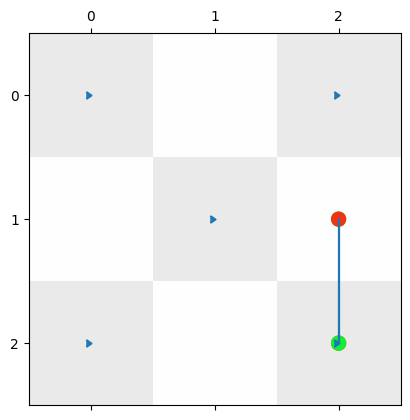

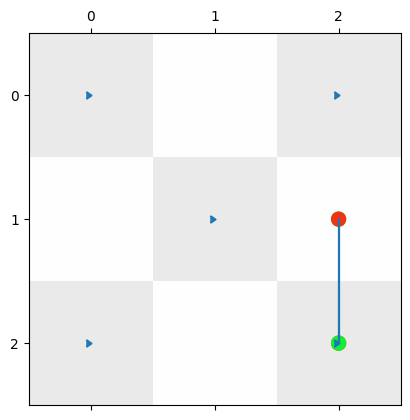

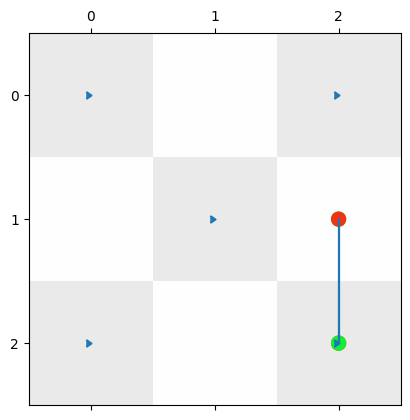

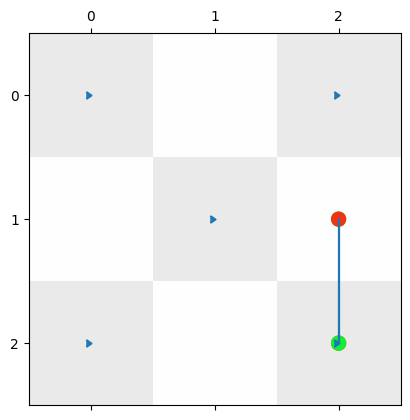

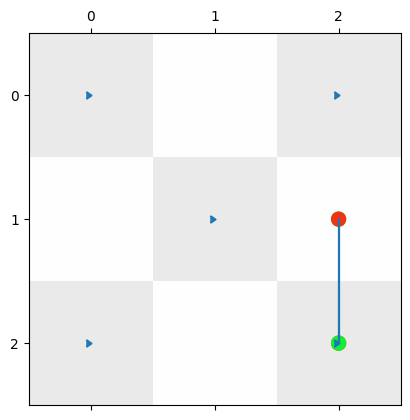

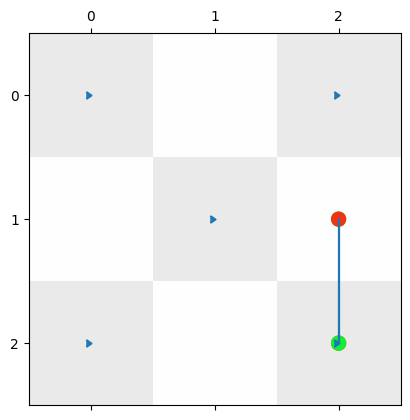

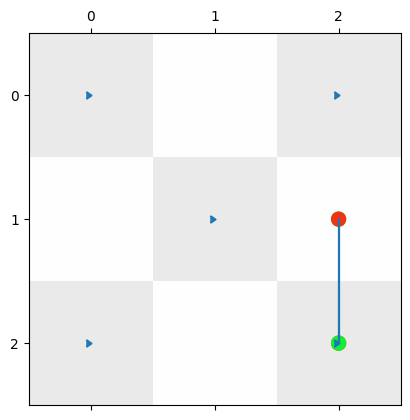

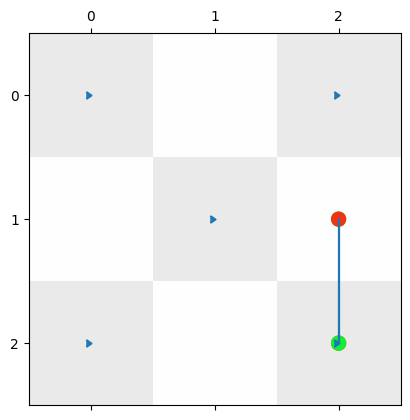

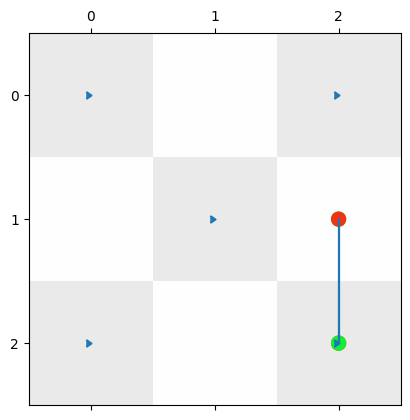

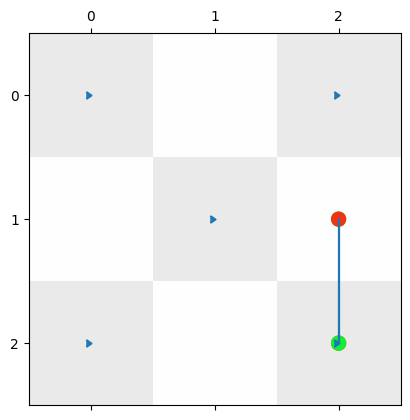

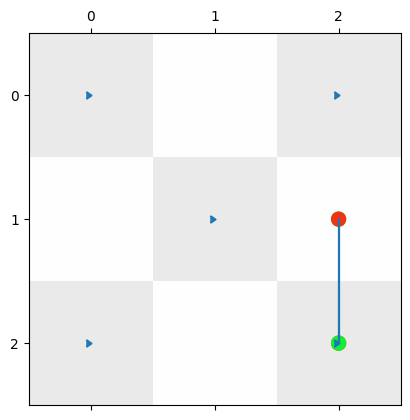

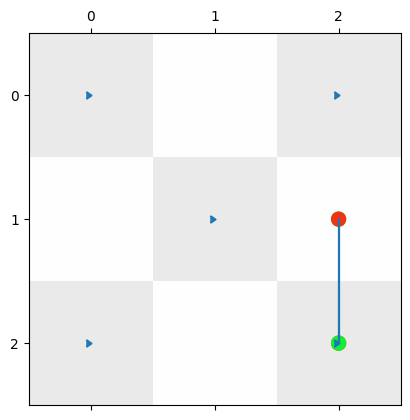

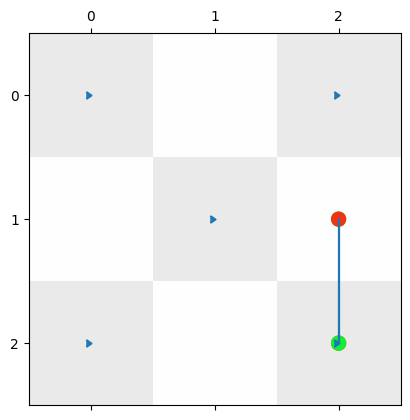

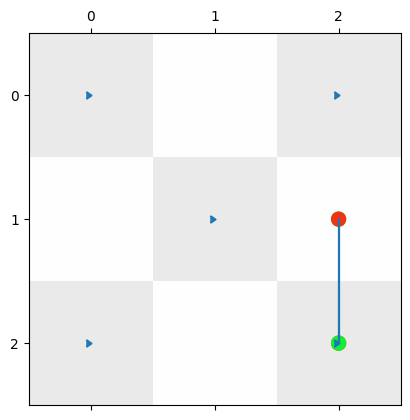

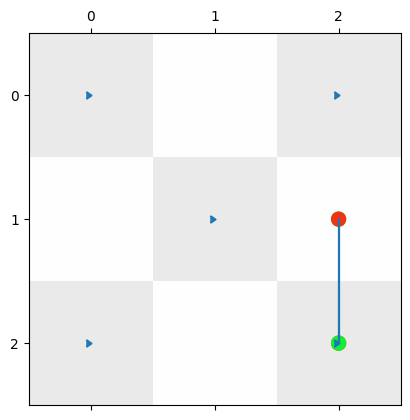

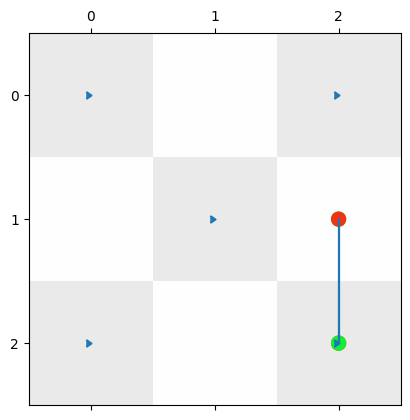

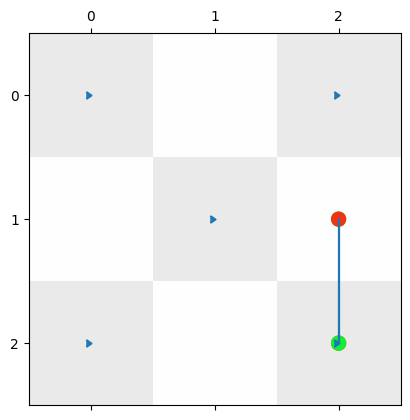

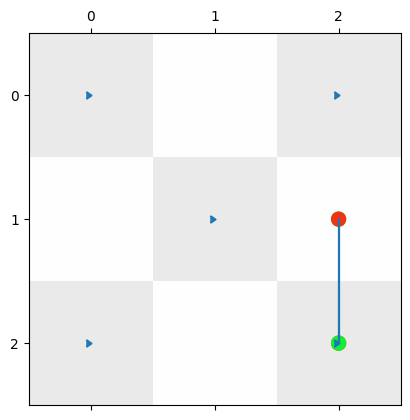

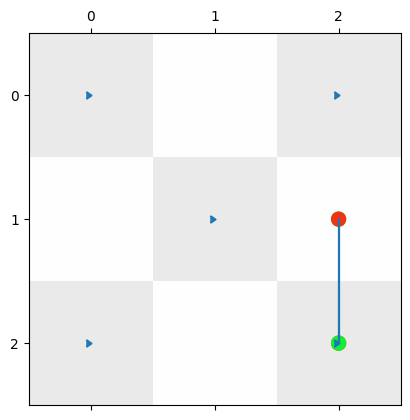

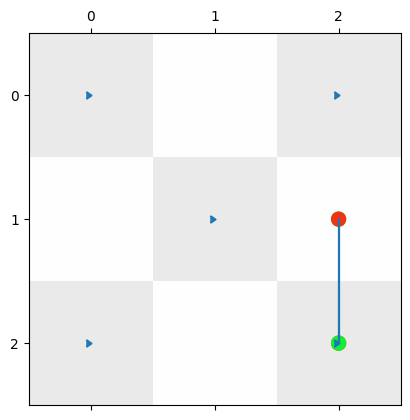

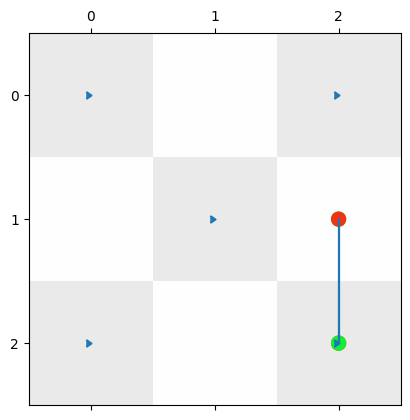

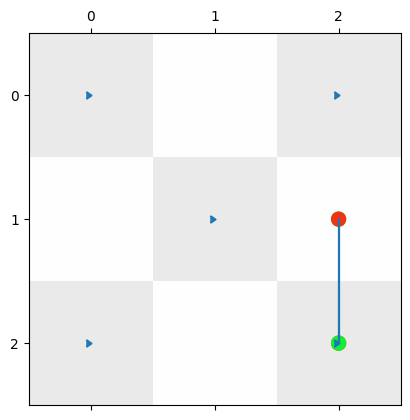

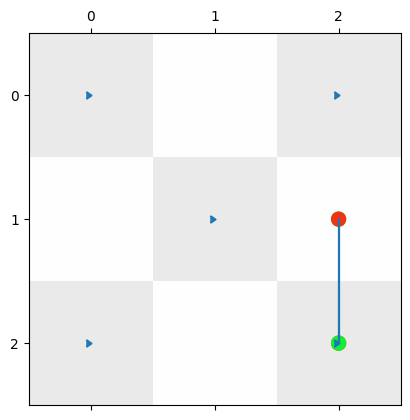

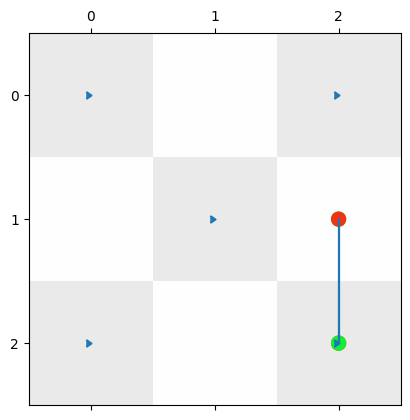

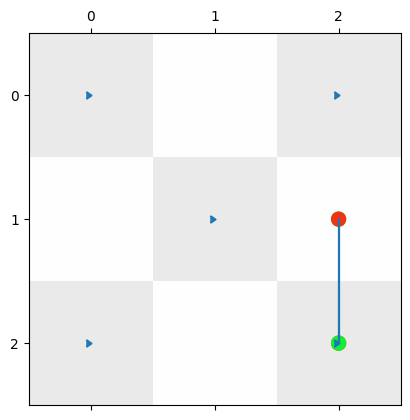

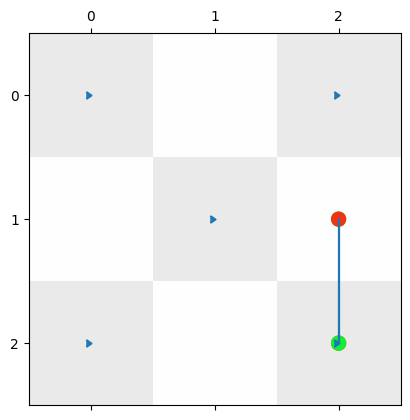

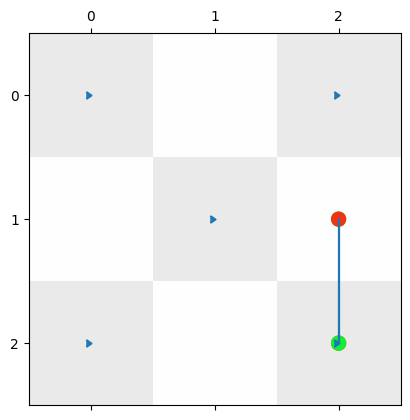

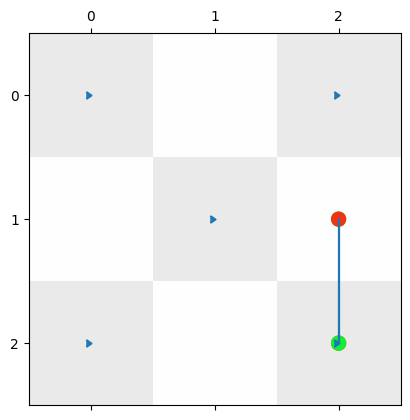

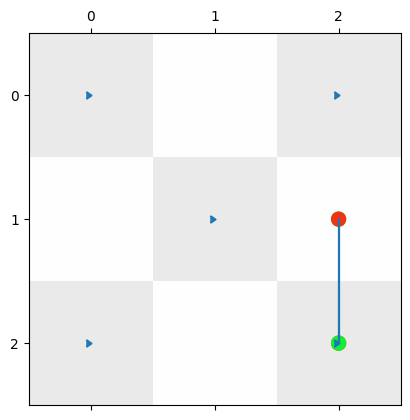

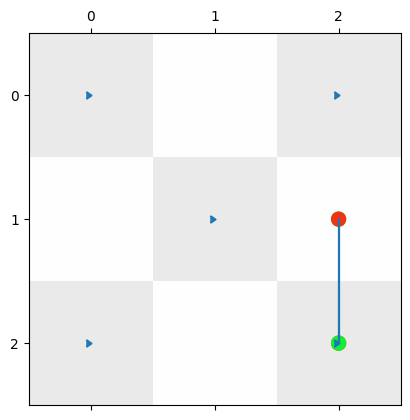

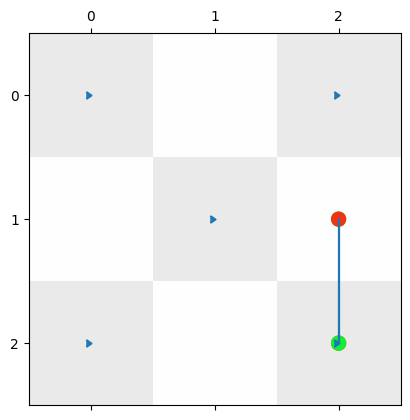

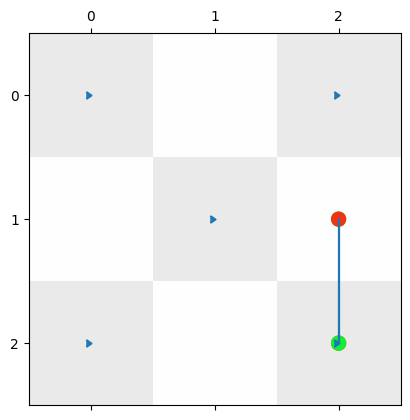

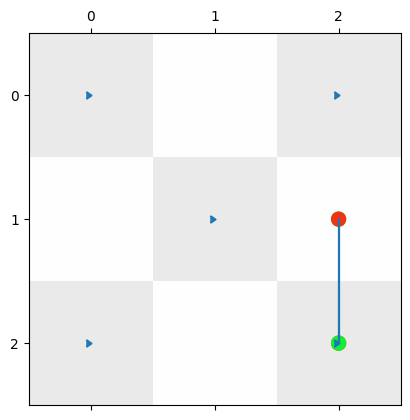

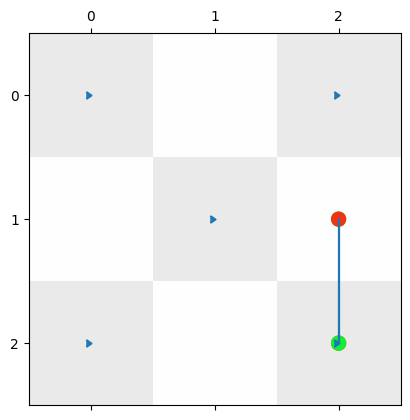

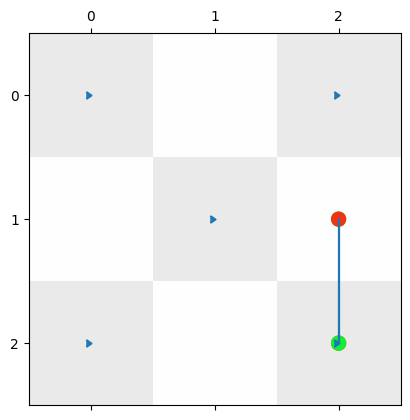

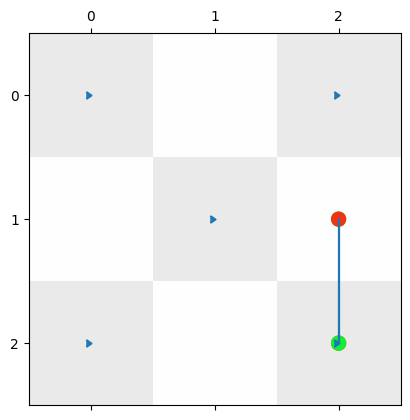

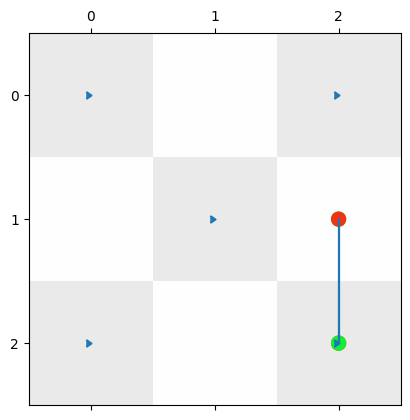

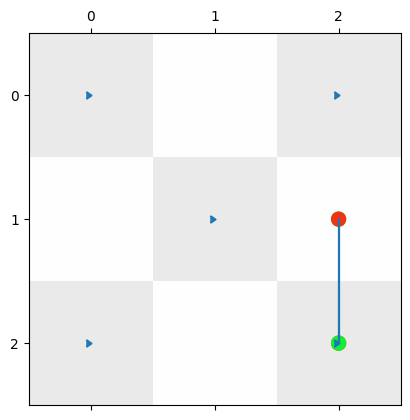

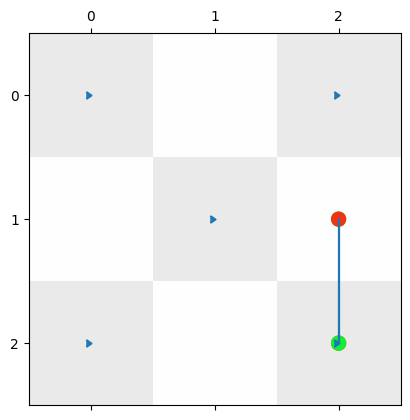

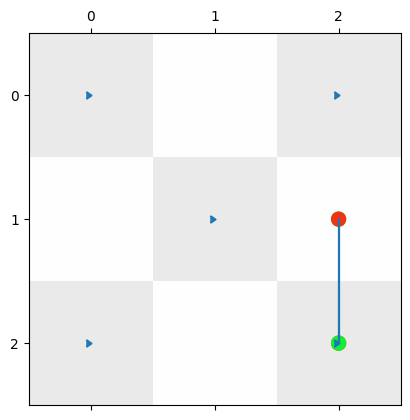

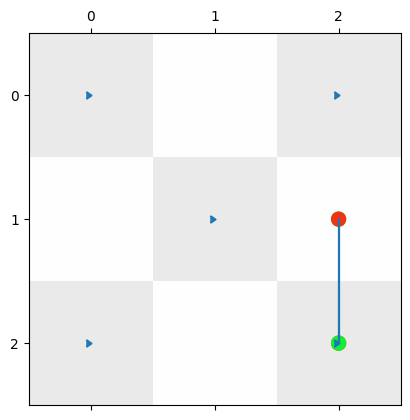

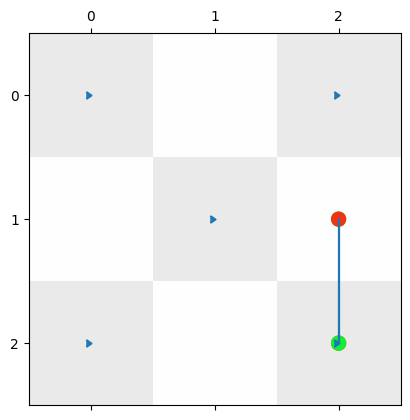

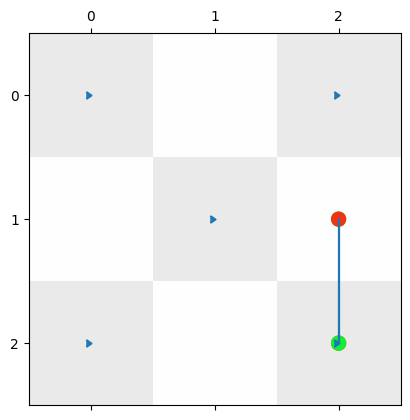

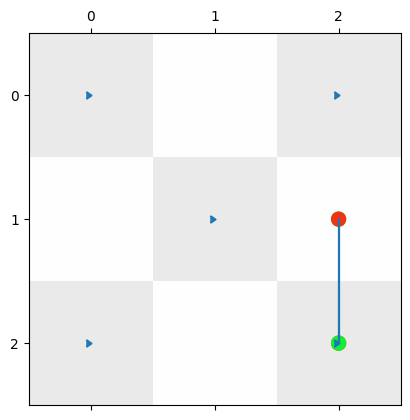

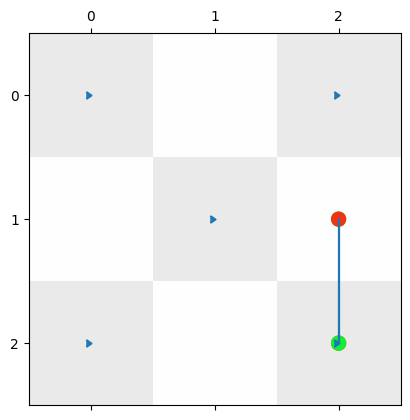

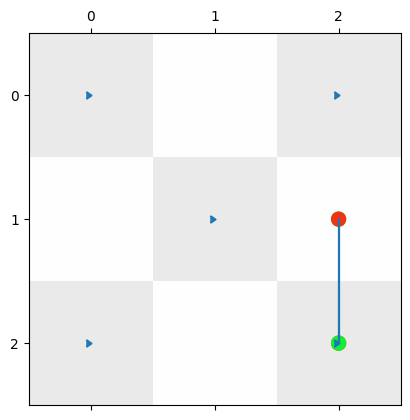

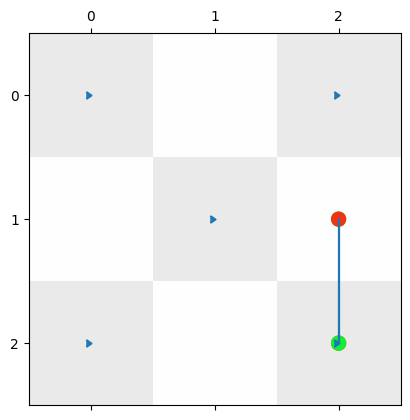

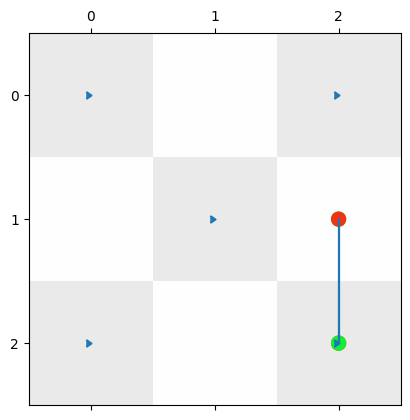

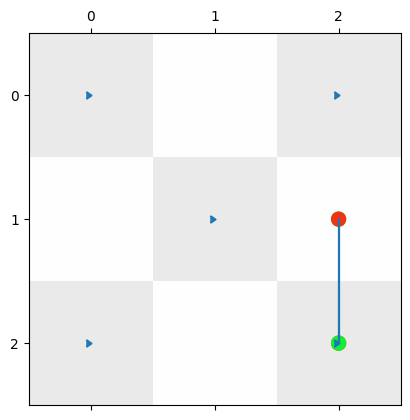

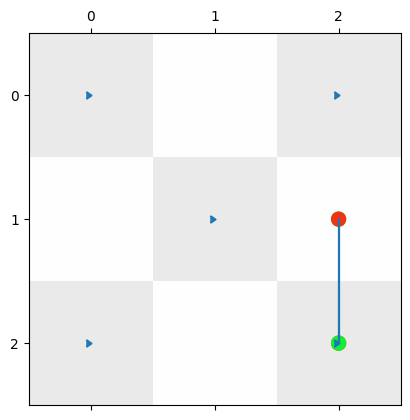

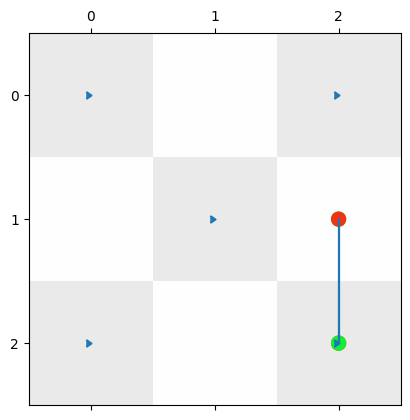

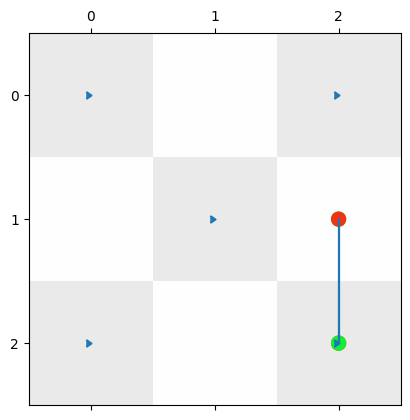

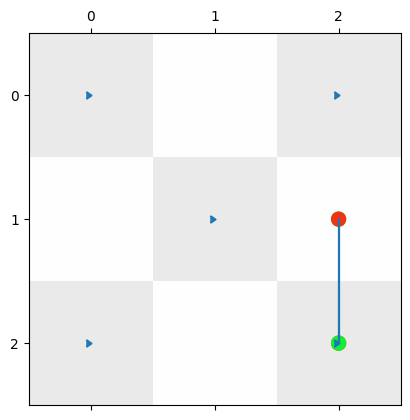

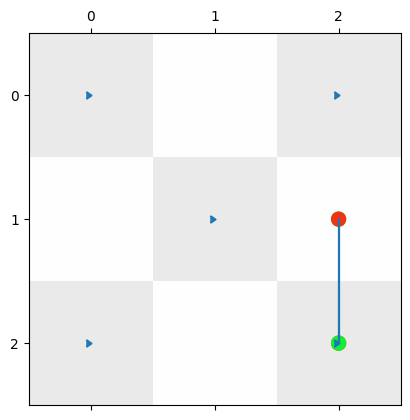

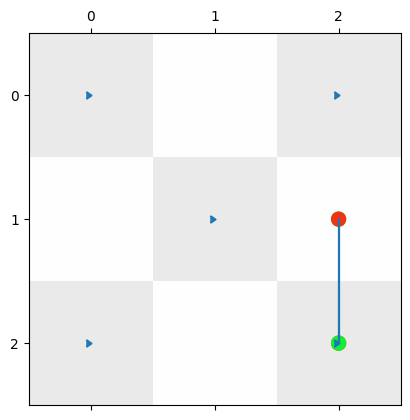

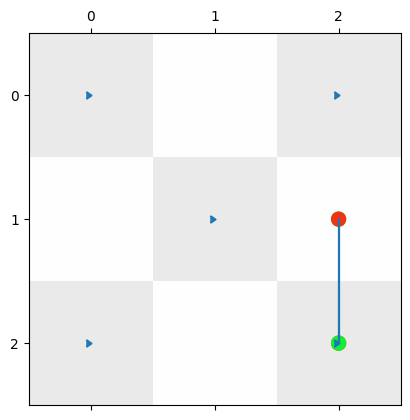

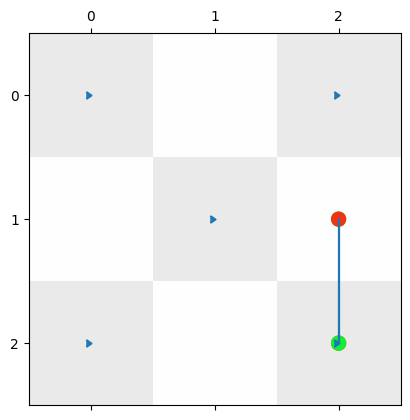

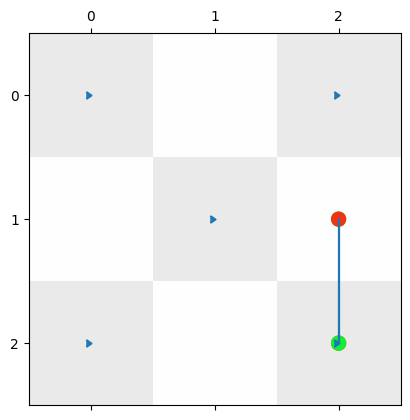

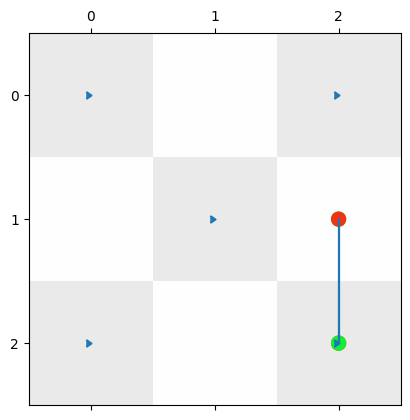

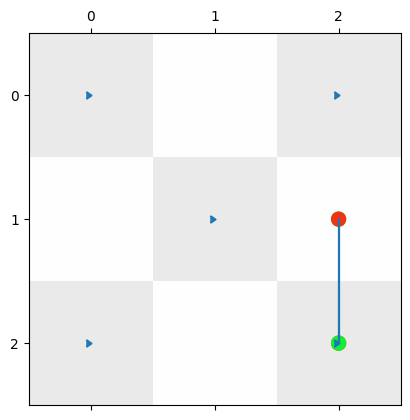

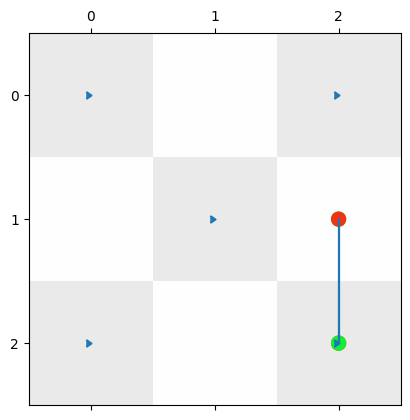

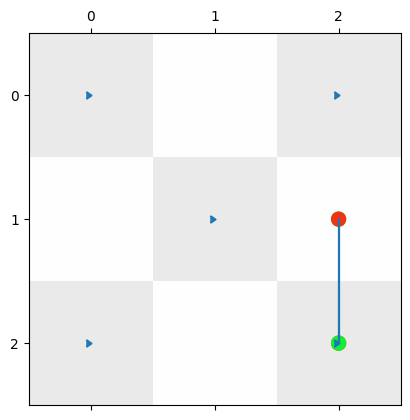

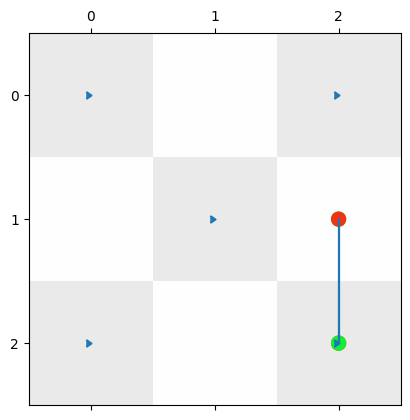

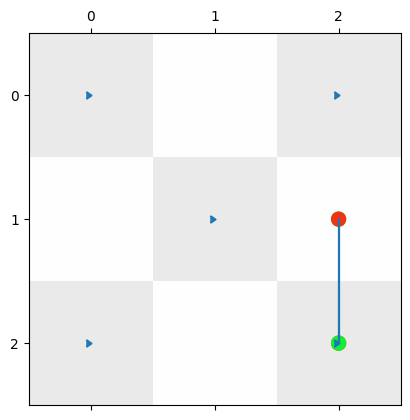

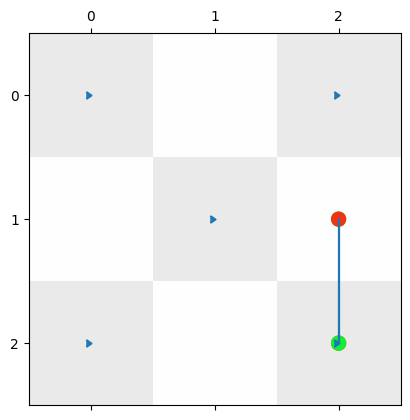

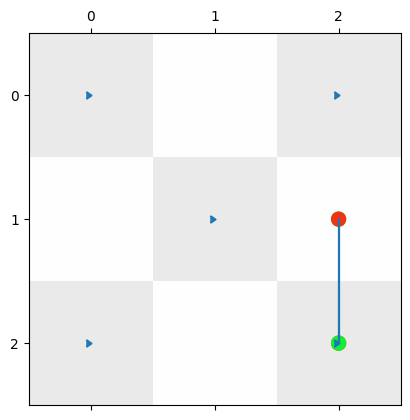

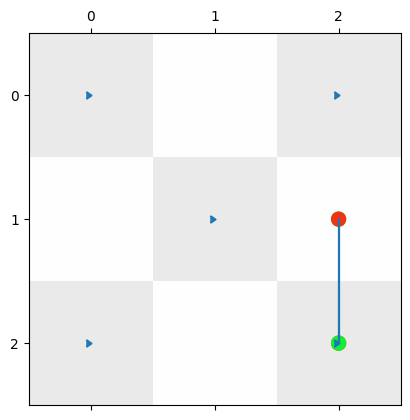

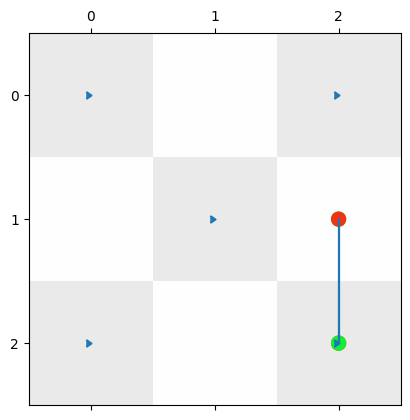

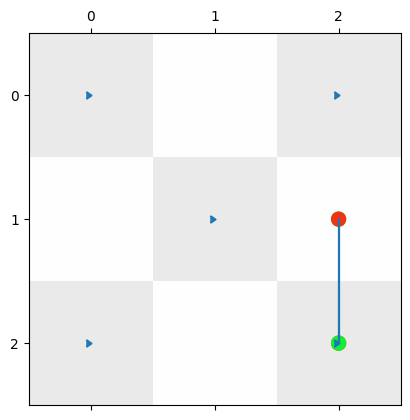

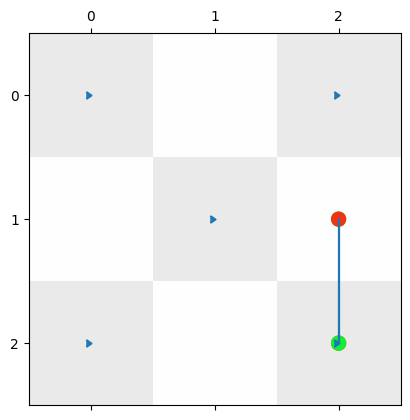

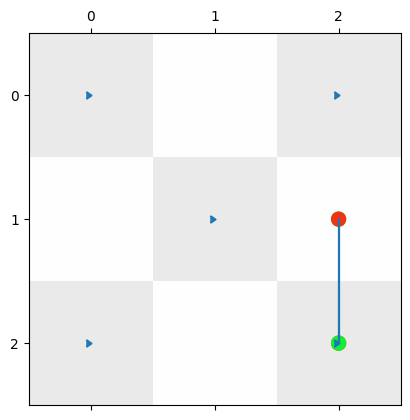

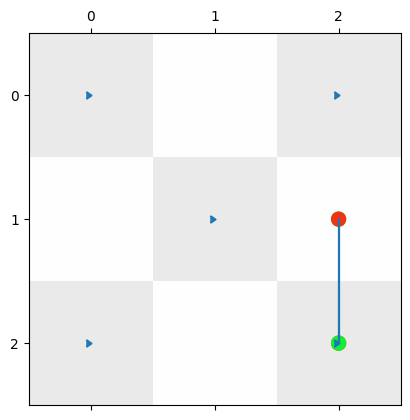

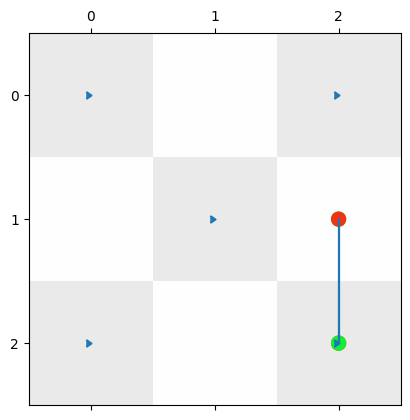

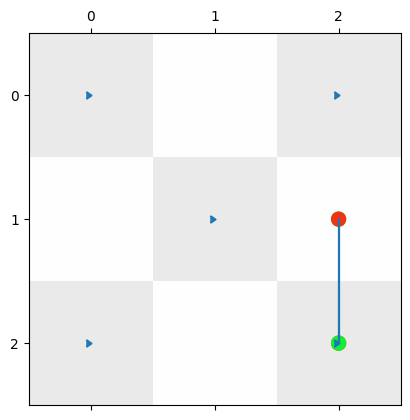

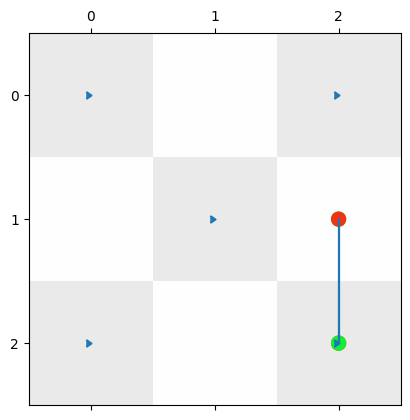

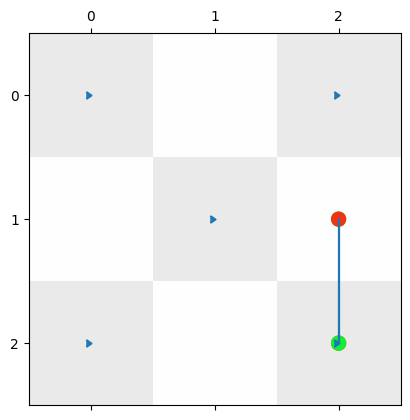

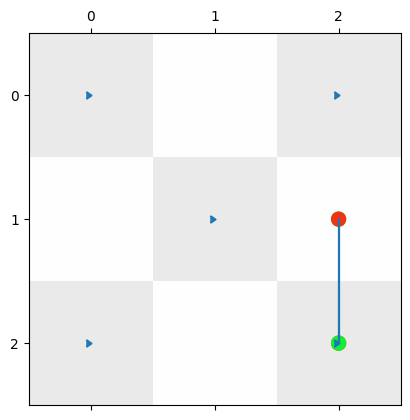

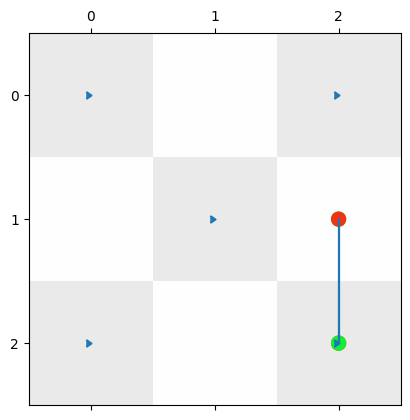

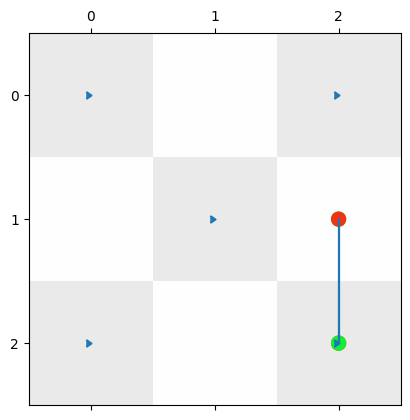

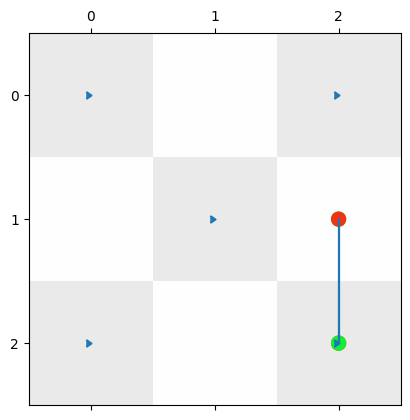

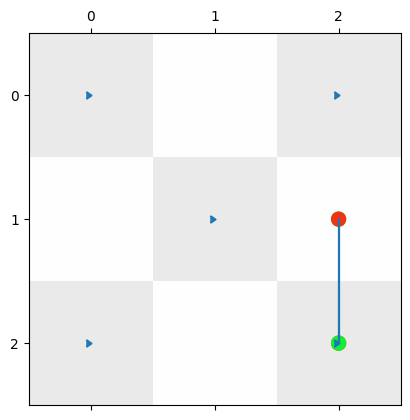

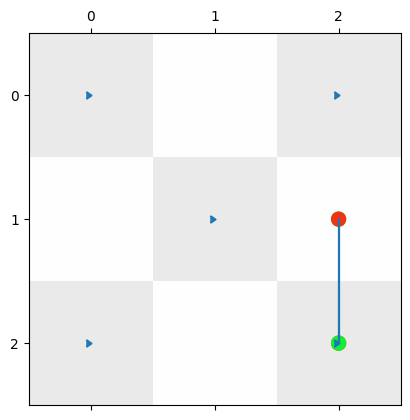

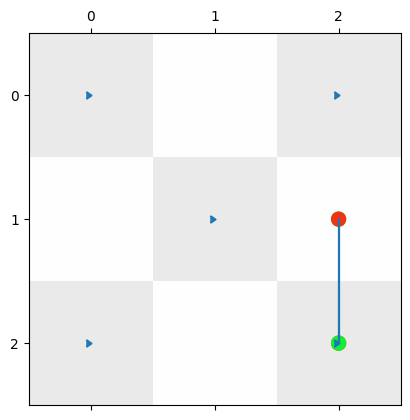

In [3]:
model = Lattice_HP_QUBO(
    dim = [3, 3],
    sequence="HPPH",
    Lambda=(2.1, 2.4, 3.0),
)
Q_qubo = model.interaction_matrix()
h_ising, J_ising, offset_ising = qubo_to_ising(Q_qubo)

sampler = SimulatedAnnealingSampler()

mysamples = [] 

betas=[1.05**j for j in range(25)]
for i in range(0, 100):
    print("Asking SA sampler for a sample")
    sampleset = sampler.sample_ising(
        h_ising, J_ising,
        offset=offset_ising,
        beta_schedule_type='custom',
        beta_schedule=betas,
        beta_range=[min(betas), max(betas)],
        num_sweeps_per_beta=100_000,
        num_reads=2,
        )
    print(sampleset.info)
    print("Received sample set")
    sample0 = sampleset.record[0]
    model.print_energies(sample0.sample)
    mysamples.append(sample0.sample)

for s in mysamples:
    model.show_lattice(s)